In [77]:
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from neo import io
import quantities as pq
import seaborn as sns
from datetime import date

#this makes the file play nicely with adobe illustrator
mpl.rcParams['pdf.fonttype'] = 42

#%matplotlib inline

sns.set(style="ticks")

## file i/o functions

In [2]:
def read_file(filepath):
    '''Reads in one WinEDR recording. Returns current and time'''
    r = io.WinEdrIO(filename=filepath)
    seg = r.read_segment(lazy=False, cascade=True,)
    I = seg.analogsignals[0]
    time = seg.analogsignals[0].times
    return (I, time)

In [3]:
#order for plotting
order = ['—', 'GRIA1', 'WT',  'G47E', 'D302G','I375V', 'P528T', 'PQK528-530Del', 'P528-530Del', 'Q607E', 'G609R', 'D611N', 
                 'A639S', 'A643T' 'F644L', 'T646N', 'V647L']
sort_dict = dict(zip(order, range(len(order))))

#organise the df
def sort_df(df):
    df = df[df['Include'] == 'Y']
    df['order'] = [sort_dict[m] for m in df['Mutant']]
    df = df.sort_values('order')
    df['Mutant'] = df['Mutant'].replace('GRIA1','—')
    return df

In [44]:
# include today's date in output files

def save_fig(name, fig_object):
    d = date.today().strftime('%y%m%d')
    filename = d+name+'.pdf'
    plt.savefig(filename, transparent=True)


## colorscheme

In [5]:
#colordict as defined in GluA2 graphs resubmit

all_mutants = ['WT', '—', 'G47E', 'D302G', 'I375V', 'P528T', 'P528-530Del', 'Q607E', 
               'G609R', 'D611N', 'A639S', 'A643T', 'F644L', 'T646N', 'V647L',]
rgb15 = sns.color_palette('hls', n_colors=15)
color_dict = dict(zip(all_mutants, rgb15))

In [69]:
color_dict

{'A639S': (0.37119999999999997, 0.33999999999999997, 0.85999999999999999),
 'A643T': (0.57919999999999994, 0.33999999999999997, 0.85999999999999999),
 'D302G': (0.72479999999999989, 0.85999999999999999, 0.33999999999999997),
 'D611N': (0.33999999999999997, 0.51679999999999993, 0.85999999999999999),
 'F644L': (0.7871999999999999, 0.33999999999999997, 0.85999999999999999),
 'G47E': (0.85999999999999999, 0.78720000000000001, 0.33999999999999997),
 'G609R': (0.33999999999999997, 0.72479999999999989, 0.85999999999999999),
 'I375V': (0.51679999999999993, 0.85999999999999999, 0.33999999999999997),
 'P528-530Del': (0.33999999999999997,
  0.85999999999999999,
  0.57920000000000016),
 'P528T': (0.33999999999999997, 0.85999999999999999, 0.37119999999999997),
 'Q607E': (0.33999999999999997, 0.85999999999999999, 0.78720000000000012),
 'T646N': (0.85999999999999999, 0.33999999999999997, 0.72479999999999956),
 'V647L': (0.85999999999999999, 0.33999999999999997, 0.51679999999999948),
 'WT': (0.8599999

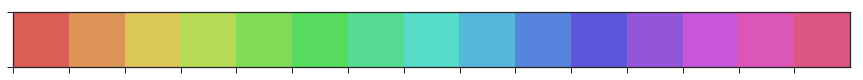

In [94]:
sns.palplot(color_dict.values())

In [105]:
# experimenting with a different colordict

color_dict2 = {'A639S': (0.45119999999999971, 0.33999999999999997, 0.85999999999999999),
 'D302G': (0.85999999999999999, 0.61119999999999997, 0.33999999999999997),
 'D611N': (0.33999999999999997, 0.46879999999999972, 0.85999999999999999),
 'F644L': (0.69120000000000026, 0.33999999999999997, 0.85999999999999999),
 'G47E': (0.85999999999999999, 0.37119999999999997, 0.33999999999999997),
 'G609R': (0.33999999999999997, 0.70879999999999954, 0.85999999999999999),
 'P528-530Del': (0.33999999999999997,
  0.85999999999999999,
  0.53120000000000012),
 'P528T': (0.38880000000000003, 0.85999999999999999, 0.33999999999999997),
 'Q607E': (0.33999999999999997, 0.85999999999999999, 0.77120000000000011),
 'T646N': (0.85999999999999999, 0.33999999999999997, 0.78879999999999928),
 'V647L': (0.85999999999999999, 0.33999999999999997, 0.54879999999999951),
 'WT': (0.5, 0.5, 0.5),
 '—': (0.7, 0.7, 0.7)}

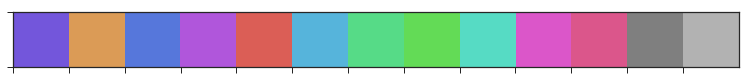

In [106]:
sns.palplot(color_dict2.values())

## Functions to excise the waveform and plot

In [6]:
class Waveform:
    def __init__(self, filename, centre, duration):
        '''centre and duration are in ms; this gives the location of the waveform
        and the length of recording to display'''
        start = int(centre - duration*0.5)
        end = int(centre + duration*0.5) 
        I, t = read_file(filename)
        self.I = I.magnitude[start:end]
        self.t = t.magnitude[start:end]
        baseline = self.I.max() #could make this a seperate function
        self.I = self.I - baseline
    

In [122]:
def plot_wave(ax, wave, mutant):
    color = color_dict2[mutant]
    ax.plot(wave.t,wave.I, color=color, linewidth=3)
    ax.set_title(mutant)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks(np.arange(int(min(wave.t)), int(max(wave.t)), 1.0))
    ax.set_xticklabels(np.arange(int(min(wave.t)), int(max(wave.t)), 1.0))
    ax.set_ylim(bottom=None, top=None, emit=True, auto=False, ymin=-2500, ymax=500)
    ax.set_yticks(range(-2000, 0, 500))
    ax.set_yticklabels(range(-2000, 0, 500))
    return ax

In [115]:
def plot_from_df(df):
    fig, axs = plt.subplots(1, 6, figsize=(14, 2), sharey=True)
    for i in range(len(df)):
        mutant = df.iloc[i, 2]
        filename = df.iloc[i,0] + '.EDR'
        centre = df.iloc[i,7]*1000
        wave = Waveform(filename, centre, 4000)
        ax = axs[i]
        plot_wave(ax, wave, mutant)
    return fig
        

## read in the data

In [116]:
# read in the information about waveforms

hom_df = pd.read_excel('GluR2_KA_summary211118.xlsx',
                              sheetname='Hom_figures_choose')


het_df = pd.read_excel('GluR2_KA_summary211118.xlsx',
                              sheetname='Het_figures_choose')

hom_df = sort_df(hom_df)
het_df = sort_df(het_df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## make the plots

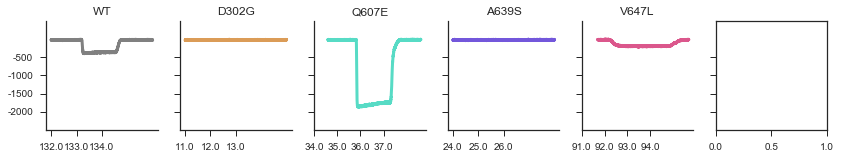

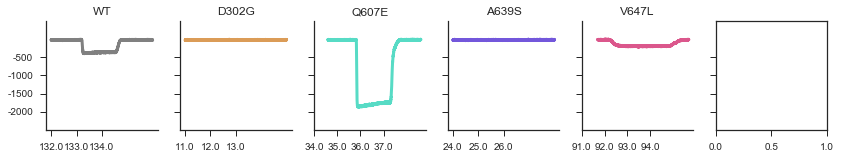

In [123]:
plot_from_df(hom_df)   

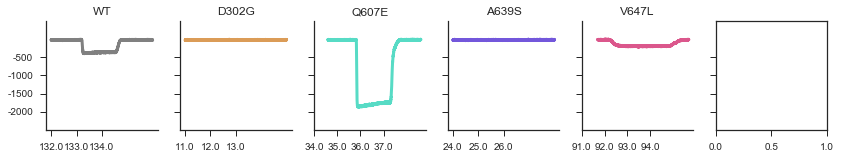

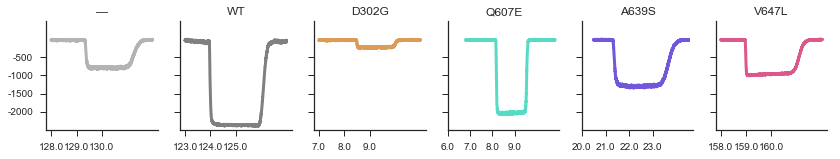

In [124]:
save_fig('hom_waves', plot_from_df(hom_df))
save_fig('het_waves', plot_from_df(het_df))
